# Transformation of Random Variables

Name: Arthur Pontes Nader

## Libraries

In [2]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

## Transformation

Let $ X \sim U(0,1)$ and $Y = X²$ the square with random side X. Is Y also a random variable? And if so, what is its distribution? 

Yes, Y is a random varible. Let's simulate it:

In [56]:
X = stats.uniform.rvs(0, 1, 2000)

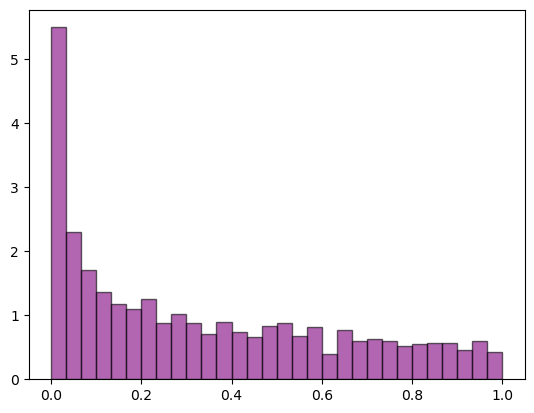

In [57]:
Y = X**2
plt.hist(Y, bins = 30, density = True,  alpha=0.6, color='purple',edgecolor='black')
plt.show()

The expected value is the expected value of X squared. So, by the denition, you have to integrate x³ from 0 to 1, which gives you 1/3 as result.

In [58]:
Y.mean()

0.33636203039446394

Let $X \sim U(0,1)$ and $W \sim U(0,1)$ and $Y = X \cdot W$ the rectangle with random side X and W. Observe the difference:

In [59]:
X = stats.uniform.rvs(0, 1, 2000)
W = stats.uniform.rvs(0, 1, 2000)
Y = X*W

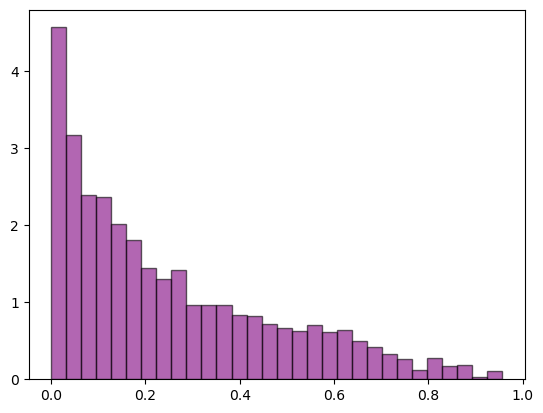

In [60]:
plt.hist(Y, bins = 30, density = True,  alpha=0.6, color='purple',edgecolor='black')
plt.show()

Remember that if X and W are two independent random variables. The following property is valid:

$$ \mathbb{E}[X \cdot W] = \mathbb{E}[X] \cdot \mathbb{E}[W] $$

So the expected value here is 0.5*0.5, which comes out to 0.25

Let $ X \sim U(0,1)$ and $Y = -log(1-X)/3$

In [63]:
X = stats.uniform.rvs(0, 1, 2000)
Y = -np.log(1-X)/3

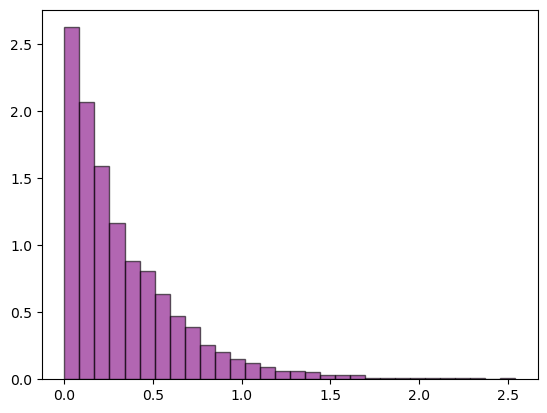

In [64]:
plt.hist(Y, bins = 30, density = True,  alpha=0.6, color='purple',edgecolor='black')
plt.show()

Let $ X \sim U(0,2\pi)$ and $Y = cos(X)$

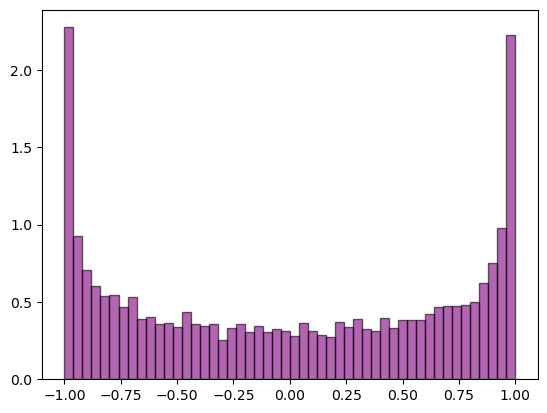

In [18]:
X = stats.uniform.rvs(0, 2*np.pi, 10000)
Y = np.cos(X)

plt.hist(Y, bins = 50, density = True,  alpha=0.6, color='purple',edgecolor='black')
plt.show()

You can generate many distributions by doing this, which may be appropriate for modeling the observed data.

## Obatining the new distribution

So far, we've observed the new distribution simulating values of the distribution we already know. But, how can we obtain the formal probability density function (PDF) or cumulative distribution function (CDF) of the new distribution?

Suppose X and Y are continuous and Y = h(X). To do this, there are two methods:
- Inversion of h: First you obtain the CDF of Y and then take its derivative, resulting in the density of Y
- Theorem of transformation of random variables.

## Inversion of h

It's more intuitive, but only works for the cases in which Y is a function of a unique r.v. X.

Consider $Y = X², X \sim U(0,1)$. Y is also between 0 and 1. Now, let's take y = 0.37. We want $F_y(0.37) = P(Y \leq 0.37)$. We have the following equality of events:

$$[Y \leq 0.37] = \{\omega \in \Omega \mid Y(\omega) \leq 0.37\}$$
$$[Y \leq 0.37] = \{\omega \in \Omega \mid (X(\omega))² \leq 0.37\}$$
$$[Y \leq 0.37] = \{\omega \in \Omega \mid X(\omega) \leq \sqrt{0.37}\}$$
$$[Y \leq 0.37] = [X \leq \sqrt{0.37}]$$

So, the probabilities are also equal:

$$F_y(0.37) = P(Y \leq 0.37) = P(X \leq \sqrt{0.37}) = F_x(\sqrt{0.37}) = \sqrt{0.37}$$

For any $y \in (0,1)$:

$$F_y(y) = P(Y \leq y) = P(X \leq \sqrt{y}) = F_x(\sqrt{y}) = \sqrt{y}$$

To obtain the density $f_Y(y)$ for $y \in (0,1)$

$$f_Y(y) = \frac{d}{dy} F_Y(y) = \frac{d}{dy} \sqrt{y} = \frac{1}{2 \sqrt{y}}$$

Let's see the pdf in the graph:

In [106]:
X = stats.uniform.rvs(0, 1, 50000)
Y = X**2

y = 1/(2*np.sqrt(np.linspace(0.008,1)))

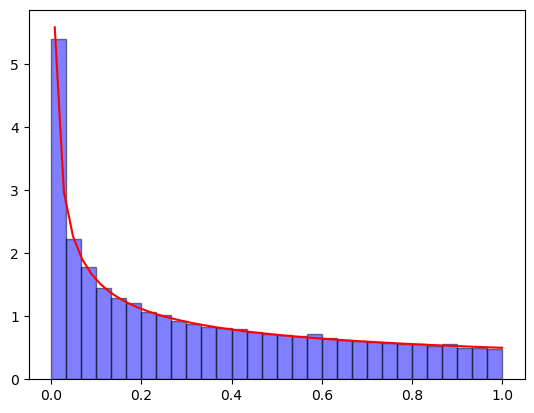

In [107]:
plt.plot(np.linspace(0.008,1), y, color = 'red')
plt.hist(Y, bins = 30, density = True,  alpha=0.5, color='blue',edgecolor='black')
plt.show()

In the general case:

$$ F_Y(y) = P(Y \leq y) = P(h(X) \leq y) $$
$$ F_Y(y) = P(X \in \{x \mid h(x) \leq y\}) $$
$$ F_Y(y) = P(X \in \{x \mid x \leq h⁻¹(y)\}) $$
$$ F_Y(y) = F_X(h⁻¹(y)) $$

## Theorem of transformation

It's more sophisticated mathematically, but allows to generalize for cases where Y is a function of more than one r.v.

Let Y = h(X). Suppose that in the support of X, the function h is inversible with g = h⁻¹ and therefore, x = g(y).
Then, the density of Y in the point y is given by:

$$f_Y(x) = f_X(g(y))\left| \frac{dg(y)}{dy} \right| = f_X(g(y))\left| \frac{dh⁻¹(y)}{dy} \right|$$

Example: $Y = h(X) = X²$ with $X \sim U(0,1)$. So, $x = g(y) = \sqrt{y}$\
By the theorem:
$f_Y(y) = f_X(\sqrt{y}) \cdot \left| \frac{d}{dy}\sqrt{y} \right|$\
$f_X(\sqrt{y}) = 1$, once $f_X(x) = 1,  \forall x$

That way, $$f_Y(y) = 1 \cdot \left| \frac{d}{dy}\sqrt{y} \right| = \frac{1}{2\sqrt{y}}$$

In [97]:
X = stats.uniform.rvs(0, 1, 50000)
Y = X**2

In [115]:
values = np.linspace(0.008,1)

In [116]:
pdf = stats.uniform.pdf(np.sqrt(values), 0 ,1) / (2*np.sqrt(values))

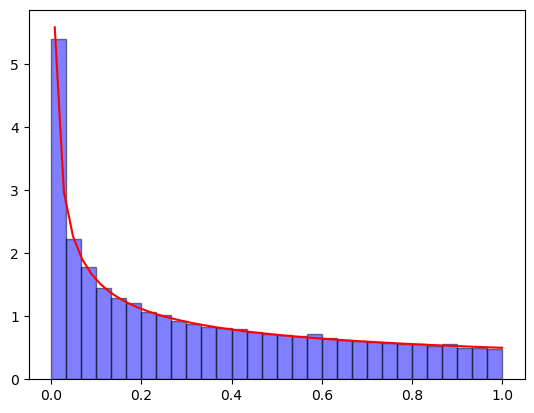

In [117]:
plt.plot(x, pdf, color = 'red')
plt.hist(Y, bins = 30, density = True,  alpha=0.5, color='blue',edgecolor='black')
plt.show()

## The expected value

Frequently, we just want the E(Y) given Y = h(X). There are two ways to obtain this:

- Obtain $f_Y(y)$ usign some previous method and then obtain 
$$E(Y) = \int y f_Y(y) \, dy $$
- Just obtain 
$$ E(Y) = E(h(X)) = \int h(x) f_X(x) \, dx $$

## An insurance problem

Suppose a world without inflation. An individual will pay a single amount at the time of signing a contract to have a life insurance. How much should this value be?

Let alpha be the annual interest rate:

In [193]:
alpha = 0.05

The individual will live T more years from the time of signing. Notice that T is a random variable. 
T years from now, the company will pay 100.000 corrected by the interest rate. The following formula gives the present value of the benefit:

$Y = 100 \cdot exp(-\alpha T) = 100 \cdot exp(-0.05 T) = 100 \cdot 0.9512^T$

In [194]:
Y = lambda t: 100 * 0.9512**t

If the individual pays this much today, the insurance company has received the amount necessary to pay back the benefit of 100 thousand. If the individual dies within 20 or 10 years, he will need to pay the following amount in the present:

In [195]:
Y(20)

36.76519148102338

In [196]:
Y(10)

60.63430669268296

The longer it takes to die, the lower the amount to be paid. But we don't know the value of T, it is random and it will be instantiated only in a future moment. If we don't have T, so we don't have Y. What is the solution? The company has to charge the expected value of Y, a fixed value instead of a r.v. For some individuals $Y > E(Y)$ and for others $Y < E(Y)$

So, $Y$ is a transformation of the r.v. $T$. $E(Y)$ is called actuarial present value.
Let's suppose $T \sim N(25,5)$

In [197]:
num_samples = 1000000
mean = 25
std = 5

# Generate random samples from T ~ N(25, 5)
random_t_values = np.random.normal(mean, std, num_samples)

# Calculate Y for each sample
y_values = Y(random_t_values)

# Calculate E[Y] by taking the mean of Y values
expected_y = np.mean(y_values)

print(f"Estimated E[Y]: {expected_y:.2f}") 

Estimated E[Y]: 29.54


The company decided to charge 30 k in the contract. The first 10 individuals lived the following:

In [208]:
data = np.random.normal(mean, std, 10) 
data

array([26.55272169, 27.45074593, 27.83029869, 30.34807835, 25.37803983,
       17.38581792, 24.21577138, 22.99583685, 21.10693746, 15.72954034])

In [209]:
Y(data)

array([26.48855439, 25.32478953, 24.84842475, 21.90746602, 28.09195286,
       41.9023321 , 29.77391087, 31.64774821, 34.78444831, 45.52249491])

What was the value that the company achieved?

In [210]:
value =  np.sum(30 - Y(data))
value

-10.292121931175146

It appears that individuals lived less than expected. Let's increase the number of people to 100 and increase the contract value to 32 k.

In [201]:
data = np.random.normal(mean, std, 100) 

In [202]:
value =  np.sum(32 - Y(data))
value

204.42617579159815

What is the probability of the company leaving with a loss? Let's simulate it:

In [203]:
num_exp = 1000
cnt = 0

for i in range(num_exp):
    
    data = np.random.normal(mean, std, 100) 
    value =  np.sum(32 - Y(data))
    
    if value < 0:
        cnt += 1

In [204]:
print("Probability: " + str((cnt/1000)*100))

Probability: 0.1
